<a href="https://colab.research.google.com/github/colegulledge/RMP-Scrape/blob/main/CSCI_638_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from tensorflow import keras
import wordcloud
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils.np_utils import to_categorical
from keras.utils.vis_utils import plot_model
from keras.models import Sequential
import tensorflow as tf
import nltk
import string
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
stop = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [ ]:
df = pd.read_csv('/content/posnegreviews.csv') # load comments
df = df[['comment', 'quality', 'posneg']] #gather features 
print(df.shape) #analayze shape 

(126478, 3)


In [ ]:
df['word_count'] = df['comment'].apply(lambda x: len(str(x).split(" ")))
df.word_count.max() #look at longest review

238

In [ ]:
reviews_split = df['comment']
print ('Number of reviews :', len(reviews_split)) #ensure shape is same as amount of reivews

Number of reviews : 126478


In [ ]:
from collections import Counter
all_text2 = ' '.join(reviews_split)
# create a list of words
words = all_text2.split()
# Count all the words using Counter Method
count_words = Counter(words)
total_words = len(words)
sorted_words = count_words.most_common(total_words)
print(count_words) #count words

Counter({'and': 193018, 'the': 179429, 'to': 156999, 'is': 134160, 'a': 128054, 'you': 126582, 'of': 78064, 'class': 77137, 'I': 74227, 'but': 68518, 'in': 59298, 'are': 50686, 'he': 50023, 'for': 48673, 'He': 43624, 'very': 40055, 'not': 39895, 'on': 39726, 'She': 36928, 'if': 36590, 'she': 35874, 'was': 34950, 'her': 34340, 'his': 33203, 'have': 32948, 'it': 32414, 'an': 31037, 'that': 30804, 'so': 29219, 'do': 28708, 'take': 28546, 'really': 27954, 'with': 27931, 'this': 27208, 'be': 26811, 'will': 26031, 'class.': 25853, 'about': 25292, 'at': 25244, 'as': 23321, 'easy': 20959, 'your': 20281, 'The': 19968, 'get': 19661, 'tests': 18754, 'good': 18070, 'all': 17966, 'can': 16645, 'what': 16145, 'hard': 15709, 'just': 15160, 'help': 14520, 'If': 14439, 'great': 14314, 'lot': 13861, 'my': 13857, 'had': 13754, 'Dr.': 13276, 'him': 13127, 'from': 13118, 'would': 12681, 'students': 12338, 'one': 12328, 'because': 12260, 'make': 12222, 'professor': 12174, 'makes': 12157, 'gives': 12013, 'go

In [ ]:
vocab_to_int = {w:i+1 for i, (w,c) in enumerate(sorted_words)} #
vocab_size = len(vocab_to_int)+1 # +1 for the 0 padding, create dictionary of words for to determine vocab size for model
print(vocab_size)
print(vocab_to_int)

104676
{'and': 1, 'the': 2, 'to': 3, 'is': 4, 'a': 5, 'you': 6, 'of': 7, 'class': 8, 'I': 9, 'but': 10, 'in': 11, 'are': 12, 'he': 13, 'for': 14, 'He': 15, 'very': 16, 'not': 17, 'on': 18, 'She': 19, 'if': 20, 'she': 21, 'was': 22, 'her': 23, 'his': 24, 'have': 25, 'it': 26, 'an': 27, 'that': 28, 'so': 29, 'do': 30, 'take': 31, 'really': 32, 'with': 33, 'this': 34, 'be': 35, 'will': 36, 'class.': 37, 'about': 38, 'at': 39, 'as': 40, 'easy': 41, 'your': 42, 'The': 43, 'get': 44, 'tests': 45, 'good': 46, 'all': 47, 'can': 48, 'what': 49, 'hard': 50, 'just': 51, 'help': 52, 'If': 53, 'great': 54, 'lot': 55, 'my': 56, 'had': 57, 'Dr.': 58, 'him': 59, 'from': 60, 'would': 61, 'students': 62, 'one': 63, 'because': 64, 'make': 65, 'professor': 66, 'makes': 67, 'gives': 68, 'go': 69, 'work': 70, 'up': 71, 'or': 72, 'like': 73, 'class,': 74, 'study': 75, 'A': 76, 'out': 77, "don't": 78, 'teacher': 79, 'material': 80, 'has': 81, 'lectures': 82, 'does': 83, 'nice': 84, 'You': 85, 'every': 86, 'on

quality
1.0    AxesSubplot(0.125,0.125;0.775x0.755)
1.5    AxesSubplot(0.125,0.125;0.775x0.755)
2.0    AxesSubplot(0.125,0.125;0.775x0.755)
2.5    AxesSubplot(0.125,0.125;0.775x0.755)
3.0    AxesSubplot(0.125,0.125;0.775x0.755)
3.5    AxesSubplot(0.125,0.125;0.775x0.755)
4.0    AxesSubplot(0.125,0.125;0.775x0.755)
4.5    AxesSubplot(0.125,0.125;0.775x0.755)
5.0    AxesSubplot(0.125,0.125;0.775x0.755)
Name: quality, dtype: object

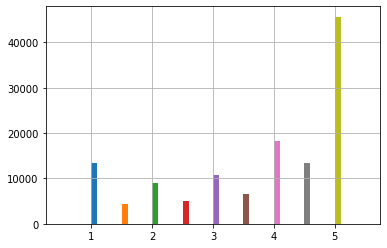

In [ ]:
df.quality.groupby(df.quality).hist() #interesting to look at specific types of quality

In [ ]:
df['comment'] = df['comment'].apply(lambda x: " ".join(x.lower() for x in x.split())) #lowercase words
df['comment'] = df['comment'].str.replace('[^\w\s]','') #puncuation 
df['comment'] = df['comment'].apply(lambda x: " ".join(x for x in x.split() if x not in stop)) #stopwords
df['comment'].sample(10)

74290                                     top notch course
62986    clear enough excel work submit online various ...
33716    bailey terrible professor literally taught us ...
3493     abernathy really funny laid back interesting l...
79834    mrs shehi great professor really knows shes ta...
79767    really like guy extremely nice helpful willing...
27478           expects way much information learned exams
68560    awesome gives good feedback drafts tell exactl...
25656    interesting easy listen class exams pretty eas...
7599             nice guy helpful calc ii tough fault well
Name: comment, dtype: object

In [ ]:
import re
import string
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags 
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

In [ ]:
df['comment'] = df['comment'].apply(lambda x: remove_emoji(x)) #remove emoojis

In [ ]:
!pip install emot
from emot.emo_unicode import UNICODE_EMO, EMOTICONS
# Function for removing emoticons
def remove_emoticons(text):
    emoticon_pattern = re.compile(u'(' + u'|'.join(k for k in EMOTICONS) + u')')
    return emoticon_pattern.sub(r'', text) 

In [ ]:
df['comment'] = df['comment'].apply(lambda x: remove_emoticons(x)) #remove emoticons 

In [ ]:
freq = pd.Series(' '.join(df['comment']).split()).value_counts()[:20] #look at word freq after stop words


In [ ]:
df['word_count'] = df['comment'].apply(lambda x: len(str(x).split(" ")))
df[['comment','word_count']].head()
df = df[df.word_count != 0]


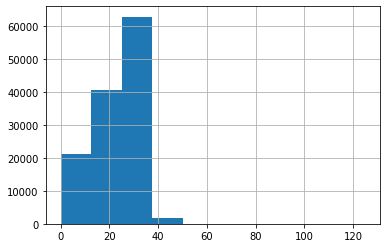

count    126478.000000
mean         22.841277
std           9.441904
min           0.000000
25%          16.000000
50%          25.000000
75%          30.000000
max         125.000000
dtype: float64

In [ ]:
tokenizer = Tokenizer()
tokenizer = Tokenizer(num_words=vocab_size, split=' ')
#num_words = len(tokenizer.word_index) + 1

tokenizer.fit_on_texts(df['comment'].values)
X = tokenizer.texts_to_sequences(df['comment']) #tokenize words
import matplotlib.pyplot as plt
%matplotlib inline
reviews_len = [len(x) for x in X]
pd.Series(reviews_len).hist()
plt.show()
pd.Series(reviews_len).describe() #look at distriubtion of length of reviews. 
#X = pad_sequences(X)

In [ ]:
X = pad_sequences(X) #pad the sequences 

In [ ]:
example = X[44] #example of padded sequence, all reviews will have 125 length now. 
example

array([    0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,   540,    27,  1129,   171,    10,    72,    71,
         165,  2585,     1,  2146,  4872,  1294, 13664,   206,   190,
         969,    14,  1965,   111,   714,    25,   513, 21872],
      dtype=int32)

In [ ]:
df.comment[44] #look at corresponding review.

'okay hes mad man good way made two girls class cry insulted family heritage expects student agree dont argue give low grade needs tranquilizer'

In [ ]:
X = (np.array(X))
y = np.array(df['posneg'])
print(X.shape)
print(y.shape)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = .33,
                                                    shuffle = True,
                                                    random_state = 37) #Toy with the test/train size
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
X_train = X_train[:25000]
y_train = y_train[:25000] #for computational purposes, limit to n and m amount of reviews 
X_test = X_test[:7500]
y_test = y_test[:7500]
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(126478, 125)
(126478,)
(84740, 125)
(41738, 125)
(84740,)
(41738,)
(25000, 125)
(7500, 125)
(25000,)
(7500,)


In [ ]:
#embed_dim = 32
#lstm_out = 64 #build the first layer
model = Sequential()
model.add(Embedding(vocab_size, 128,input_length = X.shape[1])) #embedding lyaer
#model.add(SpatialDropout1D(0.2)) #spat drouput 
model.add(LSTM(64, dropout=0.3, recurrent_dropout=0.2)) #more dropouts
model.add(Dense(32,activation='softmax')) #activation function, softmax
model.add(keras.layers.Dense(1, activation='sigmoid')) #output layer

model.compile(loss = 'mean_squared_error', optimizer='adam',metrics = ['accuracy']) #adam optimzer, accuracy metric 
print(model.summary())


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 125, 128)          13398528  
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
module_wrapper_1 (ModuleWrap (None, 1)                 33        
Total params: 13,450,049
Trainable params: 13,450,049
Non-trainable params: 0
_________________________________________________________________
None


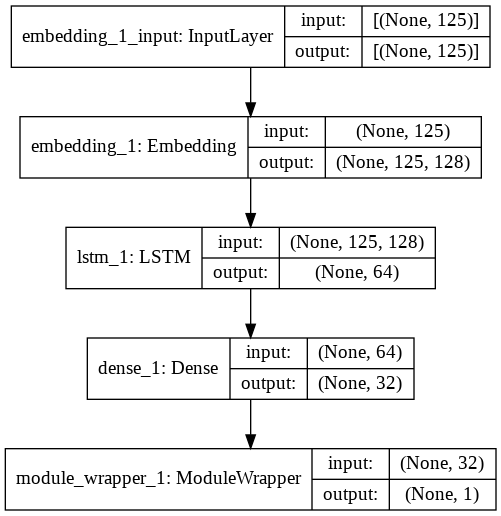

In [ ]:
plot_model(model, to_file = 'model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
batch_size = 10 #batch size 
history = model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 5, batch_size=batch_size, verbose = 2)
#fit the model

Epoch 1/5
2500/2500 - 575s - loss: 0.2077 - accuracy: 0.6806 - val_loss: 0.1579 - val_accuracy: 0.8045
Epoch 2/5
2500/2500 - 570s - loss: 0.1525 - accuracy: 0.7862 - val_loss: 0.1275 - val_accuracy: 0.8364
Epoch 3/5
2500/2500 - 570s - loss: 0.1002 - accuracy: 0.8736 - val_loss: 0.1159 - val_accuracy: 0.8420
Epoch 4/5
2500/2500 - 567s - loss: 0.0778 - accuracy: 0.8998 - val_loss: 0.1123 - val_accuracy: 0.8488
Epoch 5/5
2500/2500 - 568s - loss: 0.0622 - accuracy: 0.9211 - val_loss: 0.1166 - val_accuracy: 0.8441


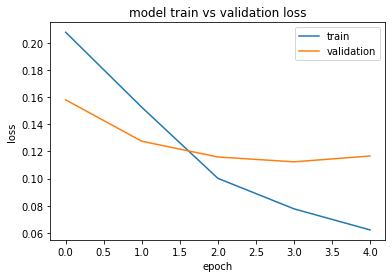

In [ ]:
from matplotlib import pyplot
#model diagnoistics
pyplot.plot(history.history['loss'])
pyplot.plot(history.history['val_loss'])
pyplot.title('model train vs validation loss')
pyplot.ylabel('loss')
pyplot.xlabel('epoch')
pyplot.legend(['train', 'validation'], loc='upper right')
pyplot.show()